# Homework 4

**Due 10/6/2020 on gradescope.**

## References

+ Lectures 11-12 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope. 

## Student details

+ **First Name:** Kiara
+ **Last Name:** Koeppen
+ **Email:** kkoeppen@purdue.edu

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
import numpy as np

## Problem 1

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

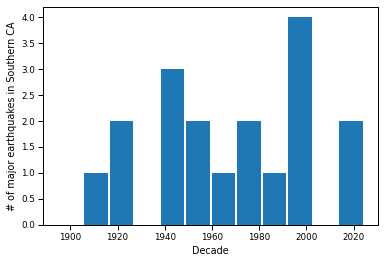

In [ ]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019 
])
fig, ax = plt.subplots()
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA');

A. The right way to model the number of earthquakes $X_n$ in a decade $n$ is using a Poisson distribution with unknown rate parameter $\lambda$, i.e.,
$$
X_n | \lambda \sim \operatorname{Poisson}(\lambda).
$$
Here we have $N = 12$ observations, say $x_{1:N} = (x_1,\dots,x_N)$ (stored in ``eq_data`` above).
Find the *joint probability* (otherwise known as the likelihood) $p(x_{1:N}|\lambda)$ of these random variables.<br>
**Answer:**
$$
p(x_{1:N}|\lambda) = \prod_{i=1}^Np(x_i|\lambda)
$$

For poisson:

$$
p(x_{1:N}|\lambda)=\prod_{i=1}^N \frac{\lambda^{x_i}e^{-\lambda N}}{x_i!}
$$

In this case N=12

<br><br><br><br><br><br><br><br>

B. The rate parameter $\lambda$ (number of major earthquakes per ten years) is positive. What prior distribution should we assign to it if we expect it to be around 2?


A convenient choice here is to pick a [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution), see also [the scipy.stats page for the Gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html) because it results in an analytical posterior.
We write:
$$
\lambda \sim \operatorname{Gamma}(\alpha, \beta),
$$
where $\alpha$ and $\beta$ are positive *hyper-parameters* that we have to set to represent our prior state of knowledge.
The PDF is:
$$
p(\lambda) = \frac{\beta^\alpha \lambda^{\alpha-1}e^{-\beta \lambda}}{\Gamma(\alpha)},
$$
where we are not conditioning on $\alpha$ and $\beta$ because they should be fixed numbers.
Use the code below to pick some some reasonable values for $\alpha$ and $\beta$.
Hint: Notice that the maximum entropy distribution for a positive parameter with known expectation is the [Exponential](https://en.wikipedia.org/wiki/Exponential_distribution), e.g., see the Table in [this wiki page](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution). Then notice that the Exponential is a special case of the Gamma (set $\alpha=1$).

2.0


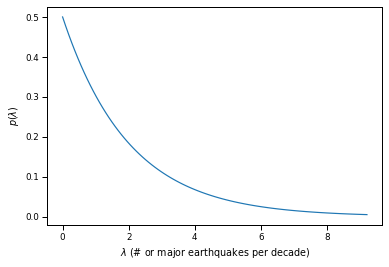

In [ ]:
import scipy.stats as st
alpha = 1  # Pick them here
beta = 0.5  # Pick them here
lambda_prior = st.gamma(alpha, scale=1.0 / beta) # Make sure you understand why scale = 1 / beta
lambdas = np.linspace(0, lambda_prior.ppf(0.99), 100)
fig, ax = plt.subplots()
ax.plot(lambdas, lambda_prior.pdf(lambdas))
ax.set_xlabel('$\lambda$ (# or major earthquakes per decade)')
ax.set_ylabel('$p(\lambda)$');
print(alpha/beta)

C. Show that the posterior of $\lambda$ conditioned on $x_{1:N}$ is also a Gamma, but with updated hyperparameters.
Hint: When you write down the posterior of $\lambda$ you can drop any multiplicative term that does not depend on it as it will be absorbed in the normalization constnat. This will simplify the notation a little bit.
<br>
**Answer:**

We know that: $\text{posterior} \propto \text{likelihood}\times\text{prior}$

So we can write this as: $p(\lambda|x_{1:N}) \propto p(x_{1:N}|\lambda) p(\lambda)$

From part A: 
$$
p(\lambda|x_{1:N}) \propto \frac{\lambda^{\sum_{i=1}^N x_i} e^{-N \lambda}}{\prod_{i=1}^N x_i!} \frac{\beta^\alpha \lambda^{\alpha-1}e^{-\beta \lambda}}{\Gamma(\alpha)}
$$

Simplifying this gives us:

$$
p(\lambda|x_{1:N}) \propto \frac{\beta^\alpha \lambda^{(\alpha-1)+\sum_{i=1}^N x_i}e^{-(N+\beta)\lambda}} {\prod_{i=1}^N x_i! * \Gamma(\alpha)}
$$

$$
p(\lambda|x_{1:N}) \propto \beta^\alpha \frac{\lambda^{(\alpha+\sum_{i=1}^N x_i)-1}e^{-(N+\beta)\lambda}} {\prod_{i=1}^N x_i! * \Gamma(\alpha)}
$$

If we say that $\alpha'=(\alpha+\sum_{i=1}^N x_i)$
and we say that $\beta'=(\beta+N)$ then we get the expression with C being a normalizing constant 

$$
p(\lambda|x_{1:N}) \propto C \frac{\lambda^{\alpha'-1}e^{-\beta' \lambda}} { \Gamma(\alpha')}
$$

This can show that:

$\lambda|x_{i:N}$ ~ $Gamma(\alpha',\beta')$

$\prod_{i=1}^N x_i!$ and $\beta^\alpha$ are absorbed into the normalization constant, C


<br><br><br><br><br><br><br><br>

D. Prior-likelihood pairs that result in a posterior with the same form as the prior as known as conjugate distributions. Conjugate distributions are your only hope for analytical Bayesian inference.
As a sanity check, look at the wikipedia page for [conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior), locate the Poisson-Gamma pair and verify your answer above.

I verified that the statement is correct based on the above equation. The equation above matches that form the Wikipedia page

E. Plot the prior and the posterior of $\lambda$ on the same plot.

1.52


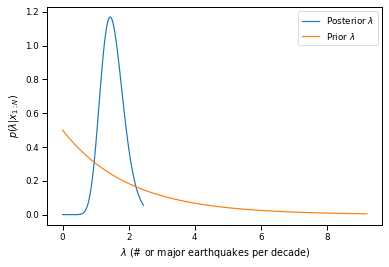

In [ ]:
N=12
alpha_prior = 1 
beta_prior = 0.5
lambda_prior = st.gamma(alpha_prior, scale=1.0 / beta_prior)
lambdas_prior = np.linspace(0, lambda_prior.ppf(0.99), 100)

alpha_post = alpha_prior+sum(eq_data) # Your expression for alpha posterior here
beta_post = beta_prior+N # Your expression for beta posterior here
lambda_post = st.gamma(alpha_post, scale=1.0 / beta_post)
lambdas_post = np.linspace(0, lambda_post.ppf(0.99), 100)
fig, ax = plt.subplots()
ax.plot(lambdas_post, lambda_post.pdf(lambdas_post), label='Posterior $\lambda$')

ax.plot(lambdas_prior, lambda_prior.pdf(lambdas_prior), label='Prior $\lambda$')
ax.set_xlabel('$\lambda$ (# or major earthquakes per decade)')
ax.set_ylabel('$p(\lambda|x_{1:N})$')
ax.legend()
print(alpha_post/beta_post)

F. Let's work out the predictive distribution for the number of major earthquakes during the next decade.
This is something that we did not do in class, but it will appear again and again in future lectures.
Let $X$ be the random variable corresponding to the number of major eathquakes during the next decade.
We need to calculate:
$$
p(x|x_{1:N}) = \text{our state of knowledge about $X$ after seeing the data}.
$$
How do we do this?
We just use the sum rule:
$$
p(x|x_{1:N}) = \int_{0}^\infty p(x|\lambda, x_{1:N}) p(\lambda|x_{1:N})d\lambda = \int_{0}^\infty p(x|\lambda) p(\lambda|x_{1:N})d\lambda,
$$
where going from the middle step to the rightmost one we used the assumption that the number of earthquakes occuring in each decade is independent.
Carry out this integral and show that it will give you the [negative Binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution) distribution $\operatorname{NB}(r,p)$, see also the [scipy.stats papge](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html) with parameters
$$
r = \alpha + \sum_{n=1}^N x_n,
$$
and
$$
p = \frac{1}{\beta + N + 1}.
$$
The probability density of the negative Binomial is (using the notation of wikipedia):
$$
\operatorname{NB}(k|r,p) = {k + r - 1\choose k}(1-p)^rp^k.
$$
You may also use the fact that:
$$
\begin{split}
\int_0^\infty y^{\alpha-1}e^{-\beta y}dy &=
\text{inverse normalization constant of }\operatorname{Gamma}(\alpha,\beta)\\
&= \frac{\Gamma(\alpha)}{\beta^\alpha},
\end{split}
$$
and that $\Gamma(n+1) = n!$.

**Answer:**

$$p(x|\lambda)=\frac{\lambda^{x}e^{-\lambda}}{x!}$$

$$
p(\lambda|x_{1:N}) \propto C\frac{\lambda^{\alpha'-1}e^{-\beta' \lambda}}{\Gamma(\alpha')}
$$

We defined $\alpha'$ and $\beta'$ as: $\alpha'=(\alpha+\sum_{i=1}^N x_i)$
and we say that $\beta'=(\beta+N)$

We know that:

$$
p(x|x_{1:N})=\int_0^\infty p(x|\lambda)p(\lambda|x_{1:N})d\lambda
$$

Plugging in our expressions:

$$
p(x|x_{1:N})=\int_0^\infty \frac{\lambda^xe^{-\lambda}}{x!} \frac{(\beta+N)^{\alpha+\sum_{i=1}^N x_i}\lambda^{(\alpha+\sum_{i=1}^N x_i)-1}e^{-(\beta+N)\lambda}}{\Gamma(\alpha + \sum_{i=1}^N x_i)}d\lambda
$$

Comining the two parts of the equation gives us:

$$
p(x|x_{1:N})=(\beta+N)^{\alpha+\sum_{i=1}^N x_i}\int_0^\infty \frac{\lambda^x}{x!} \frac{\lambda^{(\alpha+\sum_{i=1}^N x_i)-1}e^{-(\beta+N+1)\lambda}}{\Gamma(\alpha + \sum_{i=1}^N x_i)}d\lambda
$$

Now we plug in our expressions for r:

$$
p(x|x_{1:N})=\frac{(\beta+N)^{r}}{x! \Gamma(r)}\int_0^\infty \lambda^{x+r-1}e^{-(\beta+N+1)\lambda}d\lambda
$$

We're given that:
$$
\begin{split}
\int_0^\infty y^{\alpha_y-1}e^{-\beta_y y}dy = \frac{\Gamma(\alpha_y)}{\beta_y^{\alpha_y}},
\end{split}
$$

Solving the integral: 
$\alpha_y=x+r$ and $\beta_y= N+\beta+1$ and $p=1/\beta_y$

$$
p(x|x_{1:N})=\frac{{(\beta+N)^{r}}}{x! \Gamma(r)} \int_0^\infty \lambda^{\alpha_y-1}e^{-\beta_y\lambda}d\lambda=\frac{{(\beta+N)^{r}}}{x! \Gamma(r)} \frac{\Gamma(\alpha_y)}{\beta_y^{\alpha_y}}=\frac{p^{x}}{x! \Gamma(r)} \Gamma(x+r){(1-p)}^r
$$

We simplified this equation because: 

$$
(\frac{1}{\beta+N+1})^r (\frac{1}{\beta+N+1})^x (\beta+N)^r=(\frac{\beta+N}{\beta+N+1})^r (p)^x=(1-\frac{1}{\beta+N+1})^r (p)^x=(1-p)^rp^x
$$

Since $\Gamma(n+1) = n!$

$$
p(x|x_{1:N})=\frac{p^{x}}{\Gamma(x-1) \Gamma(r)} \Gamma(x+r){(1-p)}^r
$$


$$
p(x|x_{1:N})=\frac{(x+r-1)!}{(x)! (r-1)!}(1-p)^r p^{x}= {x + r - 1\choose x}(1-p)^rp^x
$$


G. Plot the predictive distribution $p(x|x_{1:N})$.

19
0.07407407407407407
12


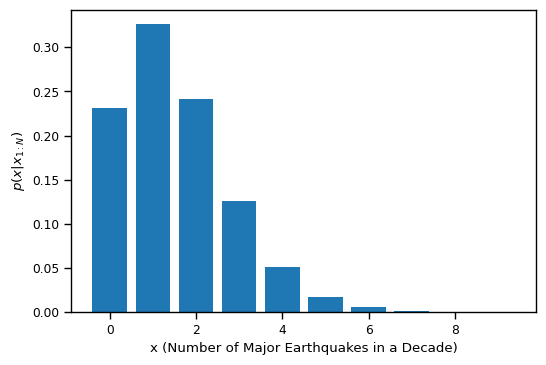

In [ ]:
r = alpha+sum(eq_data) # Your expression for r here
p = 1/(beta+N+1) # Your expression for p here
X = st.nbinom(r, 1.0 - p) # Please pay attention to the fact that the wiki and scipy.stats
                              # use slightly different definitions
print(r)
print(p)
print(N)
# your code here
fig, ax = plt.subplots(dpi=100)
ax.bar(range(10), X.pmf(range(10)))
ax.set_xlabel('x (Number of Major Earthquakes in a Decade)')
ax.set_ylabel('$p(x|x_{1:N}$)');

H. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**

Given the obvious rule:

1-X.pmf(0)=0.7683
<br><br><br><br><br><br><br><br>

In [ ]:
# You can also answer with code here: 
1-X.pmf(0)

0.7682879360036188

I. What is the probability that at least one major earthquake will occur during the next two decades?<br>
**Answer:**

$p(X_1+X_2 \geq 1)=1-p(X_1+X_2=0)$

$p(X_1+X_2 \geq 1)=1-p(X_1=0,X_2=0)$

$p(X_1+X_2 \geq 1)=1-p(X_1=0)p(X_2=0)= 0.9463$

<br><br><br><br><br><br><br><br>

In [ ]:
# You can also answer with code here:
1-X.pmf(0)**2

0.9463095193985369

J. Find a 95\% credible interval for $\lambda$.

In [ ]:
# Write your code here and print() your answer
lambda_low = lambda_post.ppf(0.025)
lambda_up = lambda_post.ppf(0.975)
print('Lambda is in [{0:1.2f}, {1:1.2f}] with 95% probability'.format(lambda_low, lambda_up))

Lambda is in [0.92, 2.28] with 95% probability


K. Find the $\lambda$ that minimizes the absolute loss (see lecture), call it $\lambda^*_N$.
Then, plot the fully Bayesian predictive $p(x|x_{1:N})$ in the same figure as $p(x|\lambda^*_N)$.

2.0


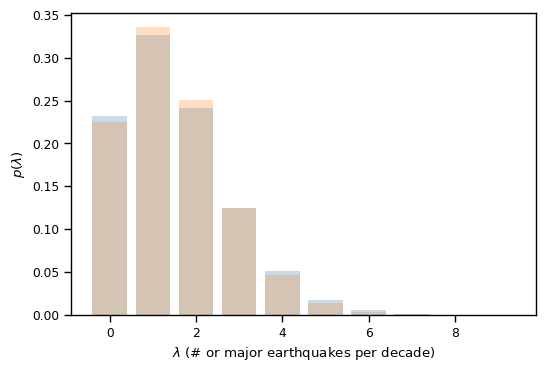

In [ ]:
# p(x|x1:N)Write your code here and print() your answer
r = alpha+sum(eq_data) # Your expression for r here
p = 1/(beta+N+1) # Your expression for p here
X = st.nbinom(r, 1.0 - p) # Please pay attention to the fact that the wiki and scipy.stats

fig, ax = plt.subplots(dpi=100)
ax.bar(range(10), X.pmf(range(10)),alpha=0.25)
ax.set_xlabel('x (Number of Major Earthquakes in a Decade)')
ax.set_ylabel('$p(x|x_{1:N}$)');

# In the example we had above:
lambda_star_1 = lambda_post.median()
lambdas_star_N=st.poisson(lambda_star_1)
lambdas_N = range(10)
ax.bar(lambdas_N, lambdas_star_N.pmf(lambdas_N), alpha=0.25)
ax.set_xlabel('$\lambda$ (# or major earthquakes per decade)')
ax.set_ylabel('$p(\lambda)$');
print(alpha/beta)

L. Draw replicated data from the model and compare them to the observed data. Hint: Complete the missing code at the places indicated below.

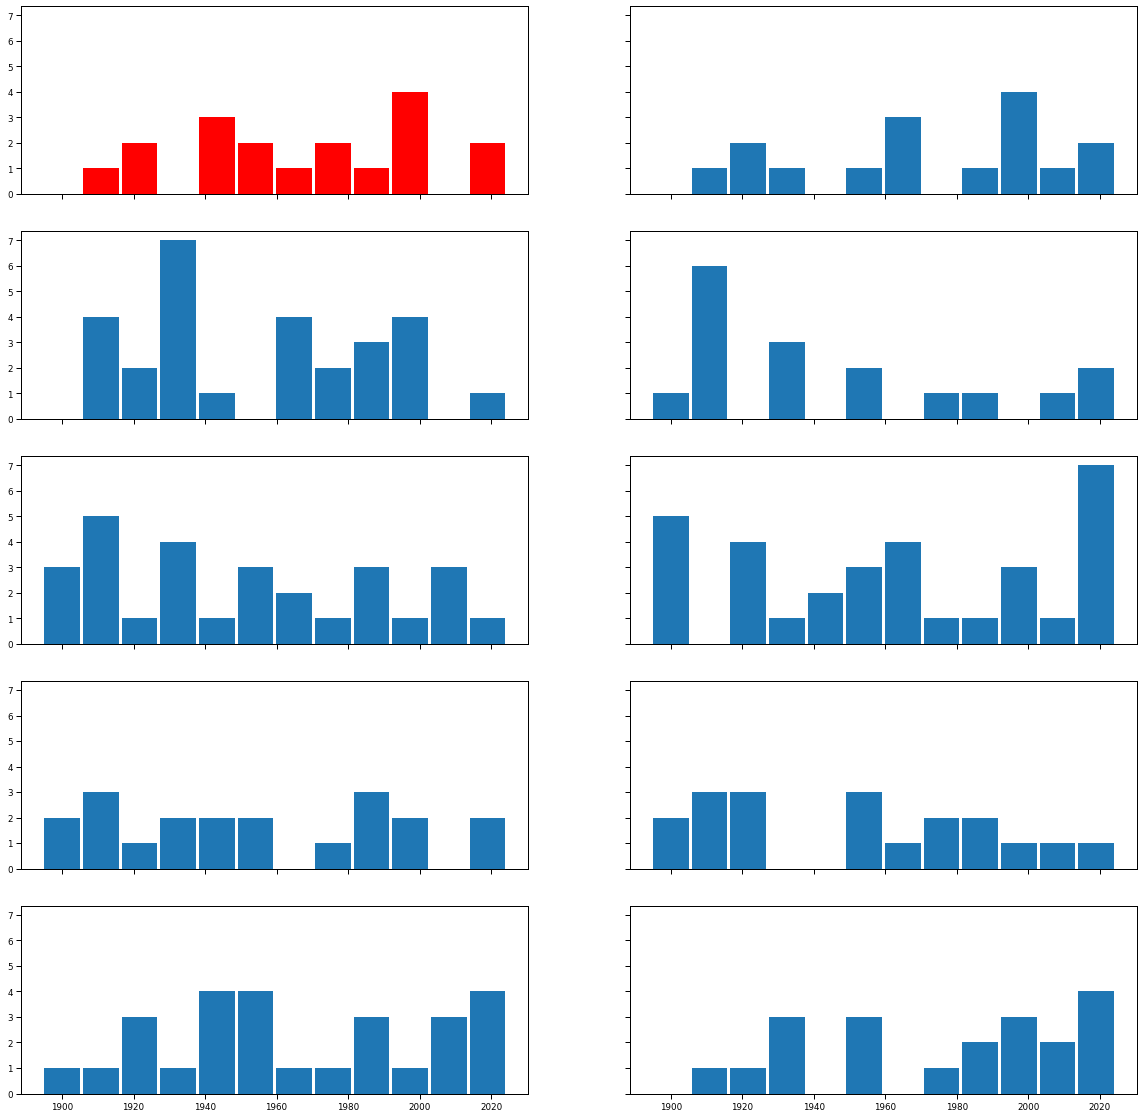

In [ ]:
# Number of replicated datasets
n_rep = 9
# A variable to store the replicated data:
x_rep = np.ndarray((n_rep, eq_data.shape[0]))
for i in range(n_rep):
    # Student code 1: Take a sample of lambda from its posterior:
    lambda_post_sample = lambda_post.rvs()
    # Student code 2: Take a sample of size eq_data.shape[0] from the Poisson with parameter
    # lambda_post_sample (You can use st.poisson)
    rv=st.poisson(lambda_post_sample)
    x_rep[i, :] = rv.rvs(size=eq_data.shape[0])
fig, ax = plt.subplots(5, 2, sharex='all', sharey='all', figsize=(20, 20))
ax[0, 0].bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10, color='red')
for i in range(1, n_rep + 1):
    ax[int(i / 2), i % 2].bar(np.linspace(1900, 2019, eq_data.shape[0]), x_rep[i-1], width=10)

M. Plot the histograms and calculate the Bayesian p-values of the following test-quantities:

+ Maximum number of consecutive decades with no earthquakes.
+ Maximum number of consecutive decades with earthquakes.


The observed test quantity is 1
The Bayesian p_value is 0.3938


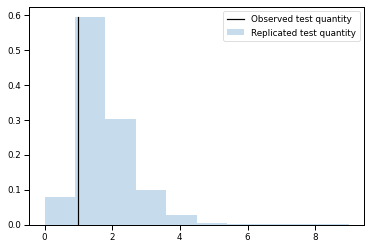

In [ ]:
# Define the test quantity as a function of the data:
def T_eq_max_neq(x):
    """
    Return the maximum number of consecutive decades with no earthquakes.
    """
    count = 0
    result = 0
    for i in range(x.shape[0]):
        if x[i] != 0:
            count = 0
        else:
            count += 1
            result = max(result, count)
    return result
    
# The observed test quantity
T_eq_max_neq_obs = T_eq_max_neq(eq_data)
print('The observed test quantity is {0:d}'.format(T_eq_max_neq_obs))
# Draw replicated data
n_rep = 5000
x_rep = np.ndarray((n_rep, eq_data.shape[0]))
for i in range(n_rep):
    # Student code 1: Take a sample of lambda from its posterior:
    lambda_post_sample = lambda_post.rvs()
    # Student code 2: Take a sample of size eq_data.shape[0] from the Poisson with parameter
    # lambda_post_sample (You can use st.poisson)
    x_rep[i, :] = st.poisson(lambda_post_sample).rvs(size=eq_data.shape[0])
# Evaluate the test quantity
T_eq_max_neq_rep = np.ndarray(x_rep.shape[0])
for i in range(x_rep.shape[0]):
    T_eq_max_neq_rep[i] = T_eq_max_neq(x_rep[i, :])
# Estimate the Bayesian p-value
p_val = np.sum(np.ones((n_rep,))[T_eq_max_neq_rep > T_eq_max_neq_obs]) / n_rep
print('The Bayesian p_value is {0:1.4f}'.format(p_val))
# Do the plot
fig, ax = plt.subplots()
tmp = ax.hist(T_eq_max_neq_rep, density=True, alpha=0.25, label='Replicated test quantity')[0]
ax.plot(T_eq_max_neq_obs * np.ones((50,)), np.linspace(0, tmp.max(), 50), 'k', label='Observed test quantity')
plt.legend(loc='best');

The observed test quantity is 6
The Bayesian p_value is 0.3694


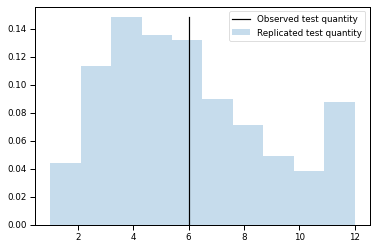

In [ ]:
# Write your code here for the second test quantity (maximum number of consecutive decades with earthquakes)
# Hint: copy paste your code from the previous cell and make the necessary modifications
# Define the test quantity as a function of the data:
def T_eq_max_neq(x):
    """
    Return the maximum number of consecutive decades with earthquakes.
    """
    count = 0
    result = 0
    for i in range(x.shape[0]):
        if x[i] == 0:
            count = 0
        else:
            count += 1
            result = max(result, count)
    return result
    
# The observed test quantity
T_eq_max_neq_obs = T_eq_max_neq(eq_data)
print('The observed test quantity is {0:d}'.format(T_eq_max_neq_obs))
# Draw replicated data
n_rep = 5000
x_rep = np.ndarray((n_rep, eq_data.shape[0]))
for i in range(n_rep):
    # Student code 1: Take a sample of lambda from its posterior:
    lambda_post_sample = lambda_post.rvs()
    # Student code 2: Take a sample of size eq_data.shape[0] from the Poisson with parameter
    # lambda_post_sample (You can use st.poisson)
    x_rep[i, :] = st.poisson(lambda_post_sample).rvs(size=eq_data.shape[0])
# Evaluate the test quantity
T_eq_max_neq_rep = np.ndarray(x_rep.shape[0])
for i in range(x_rep.shape[0]):
    T_eq_max_neq_rep[i] = T_eq_max_neq(x_rep[i, :])
# Estimate the Bayesian p-value
p_val = np.sum(np.ones((n_rep,))[T_eq_max_neq_rep > T_eq_max_neq_obs]) / n_rep
print('The Bayesian p_value is {0:1.4f}'.format(p_val))
# Do the plot
fig, ax = plt.subplots()
tmp = ax.hist(T_eq_max_neq_rep, density=True, alpha=0.25, label='Replicated test quantity')[0]
ax.plot(T_eq_max_neq_obs * np.ones((50,)), np.linspace(0, tmp.max(), 50), 'k', label='Observed test quantity')
plt.legend(loc='best');